

<h1><center> Project 5: A/B Test a New Menu Launch </center></h1>

 ###  Structure of Report
<ol>
<li><a href="#intro">Business and Data Understanding</a></li>
      &nbsp; &emsp; <a href="#1"> a. Goal of project </a>
  <br>&nbsp; &emsp; <a href="#2">b. Dataset overview </a>
  <br>&nbsp; &emsp; <a href="#3">b. Key decision </a>
<li><a href="#wrangling">Building the Training Set</a></li>
<li><a href="#eda">Train your Classification Models</a></li>
      &nbsp; &emsp; <a href="#eda">a. Logistic Regression </a>
  <br>&nbsp; &emsp; <a href="#8">b. Boosted Model </a>
  <br>&nbsp; &emsp; <a href="#9">c. Decision Tree </a>
  <br>&nbsp; &emsp; <a href="#10">d. Forest Tree </a>
 <li><a href="#conclusions">Conclusions</a></li>
  &nbsp; &emsp; <a href="#11">a. Choosing Model </a>
  <br>&nbsp; &emsp; <a href="#12">b. Prediction of Application Result </a>

<a id='intro'></a>
## 1. Business and Data Understanding
<a id='1'></a>
#### a. Goal of project

-  As a business analyst for Round Roasters, a coffee restaurant in the United States of America, I need to analyze the A/B test to figure whether the new menu can drive enough sales to offset the cost of marketing the new menu. A recommendation to whether the Round Roasters chain should launch a new menu should be written.

- Situation:
    - stagnant growth at the coffee chain, 
    - managerment wants to reignite growth at their stores.
- Initiative:
    - Introducing gourmet sandwiches to the menu, along with limited wine offerings. 
    - A television advertising campaign is crucial to drive people into the stores with these new offerings.
- Problems:
    - A significant boost in the company’s marketing budget, 
    - Unknown return on investment (ROI),
    - Current customers will not buy into the new menu offerings.
- Strategy:
    - Test the changes in two cities ( Denver and Chicag) with new television advertising
        - The stores in these two cities (or markets) perform similarly to all stores across the entire chain of stores;
        - A good proxy to predict how well the updated menu performs.
    - Test period: 12 weeks (2016-April-29 to 2016-July-21) compared with 12 weeks last years ((2015-April-29 to 2015-July-21).)
    - Scope: five stores in each of the test markets offered the updated menu along with television advertising.
- Tasks:
    - Analyzing the results of the experiment to determine whether the menu changes should be applied to all stores,
    - Predicting impact to profitability
    - In the data, profit is represented in the gross_margin variable.


<a id='2'></a>
#### b. Datasets overview
- `round-roaster-stores.csv` - This file contains store information for each Round Roaster store in the USA.

- `treatment-stores.csv` - This file contains store information for each store that offered the new menu items.

- `round-roaster-transactions.zip` - This file contains transaction level information for all of Round Roaster's stores

<a id='3'></a>
#### c. Key Decisions:
- What is the performance metric you’ll use to evaluate the results of your test?
> profitability
- What is the test period?
> Test period: 12 weeks (2016-April-29 to 2016-July-21)
- At what level (day, week, month, etc.) should the data be aggregated?
> The data should be aggregated weekly.

<a id='wrangling'></a> 
## 2. Building the Training Set
#### Dataset 1 `credit-data-training.xlsx`: 
The data set contains the data from the previous application. With this data, we create a model that is used to classify whether the applications from new customers are creditworthy or not.

In [23]:
df2 = pd.read_excel('credit-data-training.xlsx', sheet_name='Sheet1')
df2.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1


At first we will have an overview about the summary of data in this dataset. Here we can see that, the given dataset had information of 500 customers. 
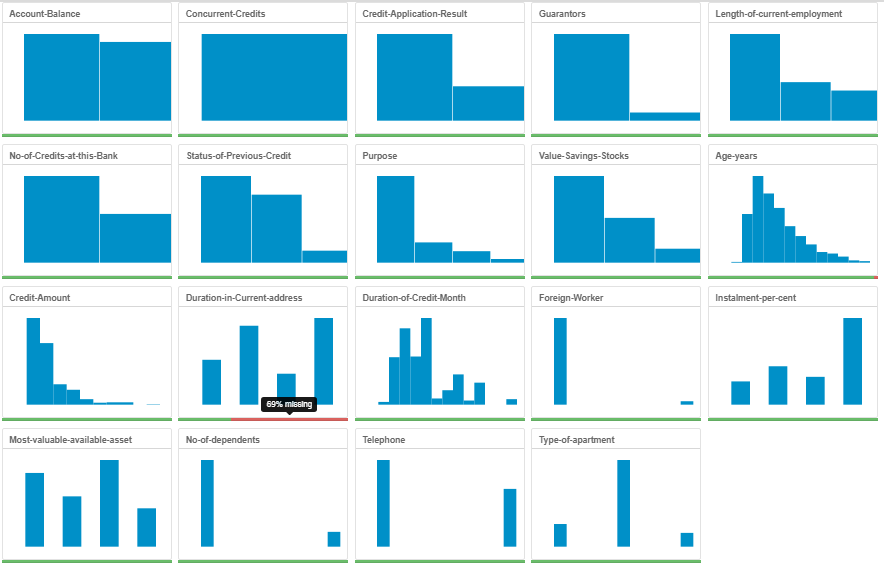

With the summary of all data, it is clear to see that a 69% data of `Duration-in-Current-address` is missing. So we cannot consider this variable to model the classification for the creditworthness of applications. This variable will be removed from the dataset. 

Another variable also missing is Age-years with around 2% missing. With a small missing data. For these data, we can generate the missing data with a predicted model, but to keep the problem not so complicatedm  we can impute this missing data with mean of data `Age-years`. 

#### Preparing Data to Modelling:
We split the data set into two parts:  70% for Estimation (for training the model) and 30% for Validation to help us verify that we are creating a useful model.

####  Dataset 2 `customers-to-score.xlsx`:
The dataset 2 includes information about the new customers. From this dataset, we will classify their credit applications with the help of prediction model into 2 type: `creditworthy` or `non-creditworthy`

In [18]:
df2 = pd.read_excel('customers-to-score.xlsx', sheet_name='Sheet1')
df2.head(3)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1


<a id='eda'></a>
## 3. Train your Classification Models
### a. Logistic Regression
#### Data Analysis
At first we will use Logistic Regression to predict the binary outcome `Credit-Application-Result` by analyzing the `Credit-Application-Result`'s relationship with other predictor variables. The `pairplot` gives us an overview about the relationship between `Credit-Application-Result` and other variables from information of presious customers.
<center> Relationship between Application Result and information of customers  </center>

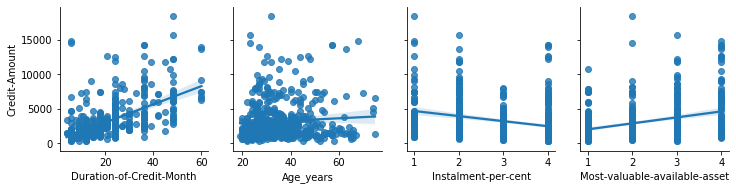

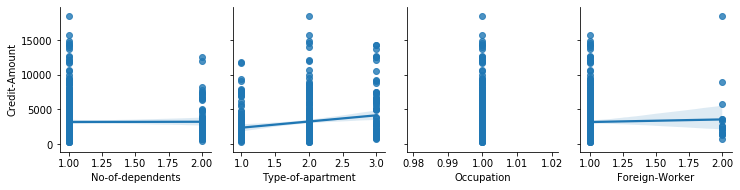

In [40]:
a=sns.pairplot(df1, x_vars=['Duration-of-Credit-Month',  'Age_years','Instalment-per-cent','Most-valuable-available-asset', ], y_vars='Credit-Amount',kind='reg') 
a=sns.pairplot(df1, x_vars=['No-of-dependents','Type-of-apartment','Occupation','Foreign-Worker',], y_vars='Credit-Amount',kind='reg') 

With the Person correlation we can see the most influencing factors on `Credit-Application-Result`with 3 statistically significant factors.
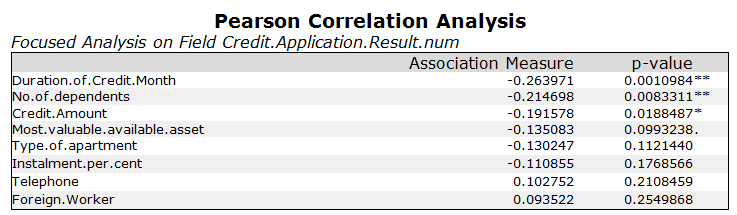

To ensure that all factors are not duplicated we can see the correlation matrix, which shows us a weak relationship between variables (all correlations are smaller than 0.7). So all variables can be used as predictor variables in Logistic Regression.

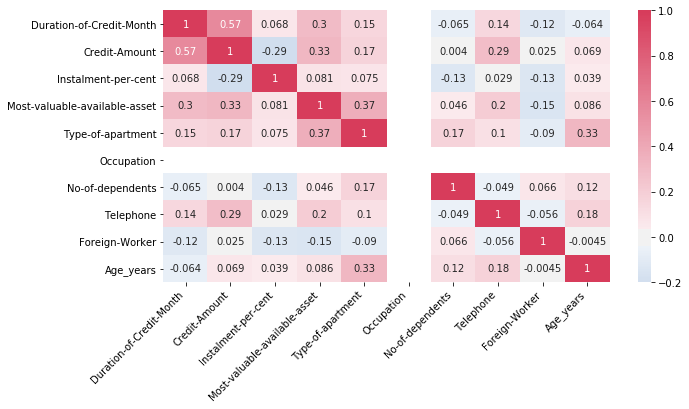

In [24]:
df1=pd.read_excel('Data2.xlsx', sheet_name='Sheet1')
corr=df1.corr()
ig, ax = plt.subplots(figsize=(10,5))
cmap=sns.diverging_palette(250, 5,n=50, as_cmap=True)
ax = sns.heatmap( corr, cmap=cmap, annot=True,vmin= -0.2, vmax=1, center=0)
ax.set_xticklabels( ax.get_xticklabels(),  rotation=45, horizontalalignment='right');

#### Data Modelling
After that we run the Logistic Regression model with the target variables `Credit-Application-Result` and predictor variables. 
Using a technique `Stepwise regression`, we can get automatically the best predictor variables.

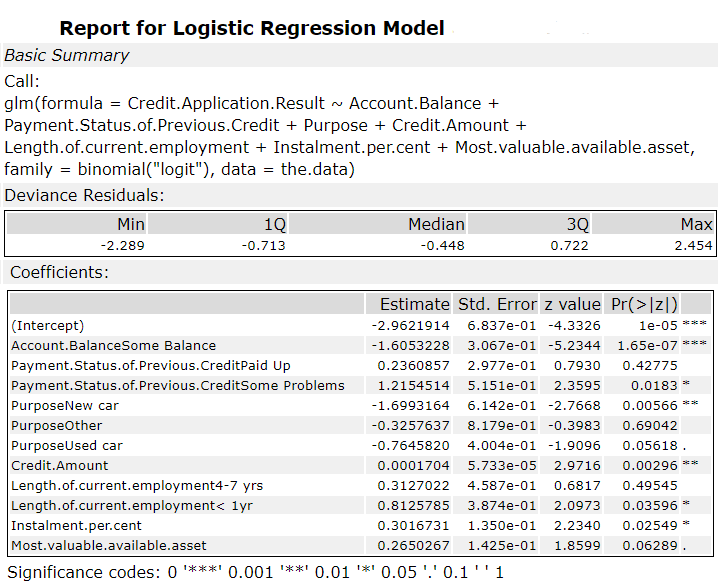
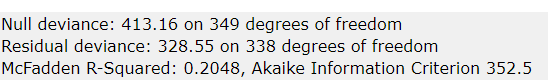

Observe the report of Logistic Model, we can see the relationship between the target and predictor variable ( with `p_value` < 0.05 then predictor variable is statistically significant). 
Another factor is that for this model `R-squared = 0.2048` which present a quite weak model.

#### Validation 
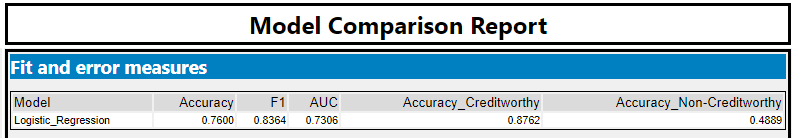
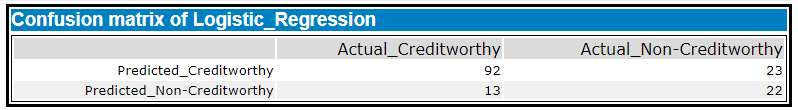

With the support of `Model Comparision`, we can see that the Accuracy of `Logistic Regression` for this prediction is 76% with 87,67% accuracy for Creditworthy but only 48.89% for Non-Creditworth.

<a id='8'></a> 
### b. Boosted Model
With Boosted Model, a machine learning technique for regression and classification problems, we can get the best predictor variables to predict `Credit-Application-Result`. With the Variable Importance Plot we can see that with this model, `Account Balance`, and `Credit-Amount` are 2 most important factors to predict the result of application for credit. Next one are `Duration-of-Credit-Month`, `Purpost` and `Payment-Status-of-Previous-Credit`. 

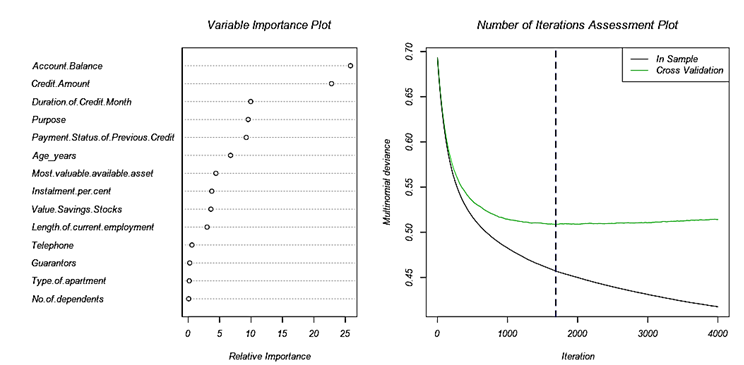

#### Data Validation
To validate this Model we use `Comparison Method` to test the validation of the model:
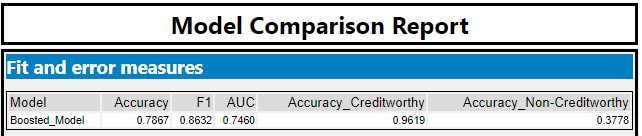
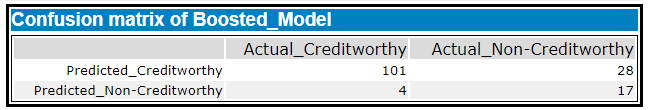

With the Model `Comparison Report`, the general accurancy of `Boosted Model` makes up 78.67% with 96.19% accuracy to predict Creditworthy, but only 37.78% for Non-Creditworthy.

<a id='9'></a> 
### c. Decision Tree
Decision tree Model is used in a predictive model to go from observations about the predictor variable to conclusions about the target variable. To predict `Credit-Application-Result`, the Decision Tree Model always choose to use the best predictor variables.

The Model Summary shows that variables used in tree construction are `Account-Balance`, `Value-Savings-Stocks`, and `Duration-of-Credit-Month`. 

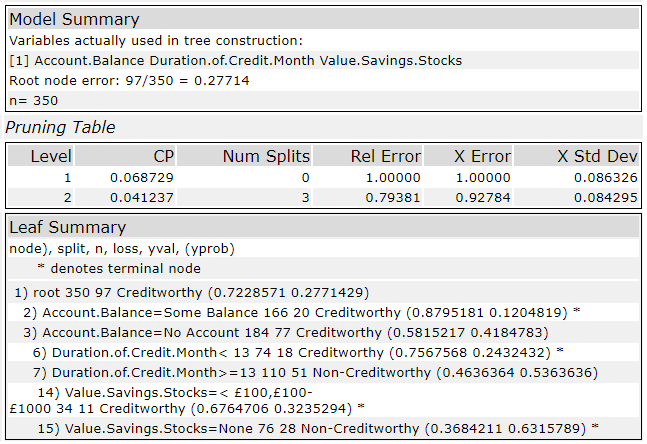

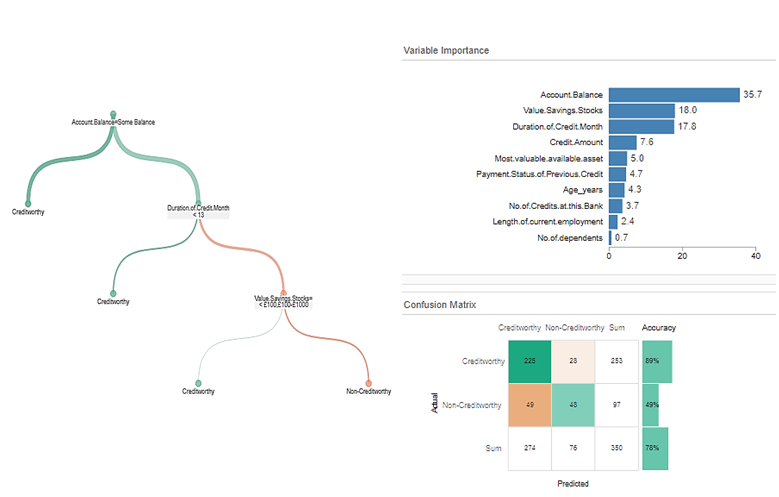

#### Model Validation
With the `Comparison Report`, we can see `Decision Tree` model has 74,67% accuracy. The accuracy rate for Creditworthy is 86.67% and Non-Creditworthy is 46.67%.

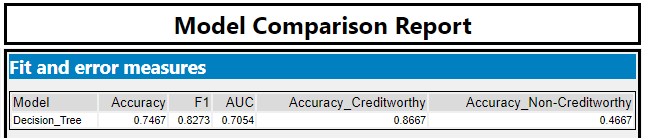
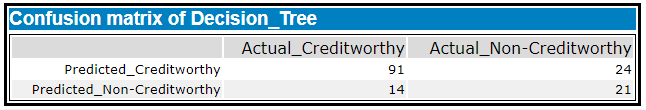

<a id='10'></a> 
### d. Forest Tree
A forest model, a machine learning methods that predict a target variable using predictor variables having influences on the target variable. To predict `Credit-Application-Result`, the Forest Tree Model always choose to use the best predictor variables.

The Model Summary shows that most important variables used in Forest Tree Model are `Credit-Amount`, `Age-years`, and `Duration-of-Credit-Month`and`Account-Balance`.
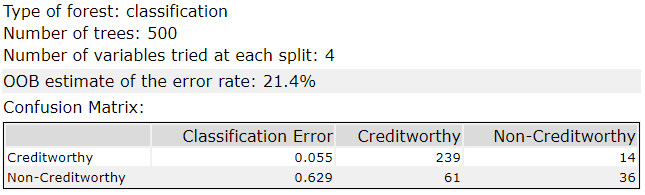

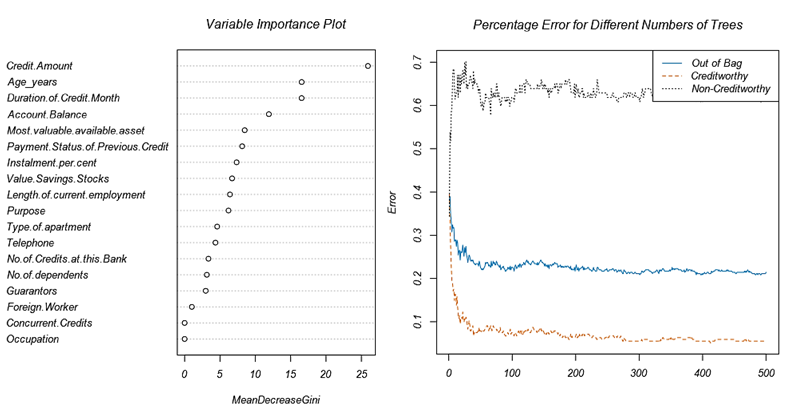


#### Validation
To validate the Forest Tree Model we use `Comparison Model`. With the Model Comparison report, we can see that the Forest Tree Model has a accuracy rate of 78.67%. Out of them, 96.19% predict accurately the application for creditworth, but only 37.78% for non creditworthy.
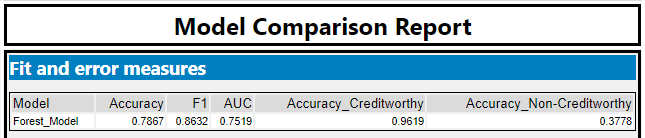
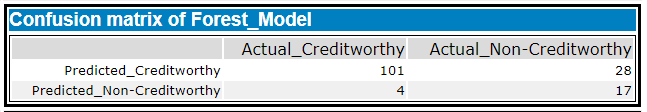

<a id='conclusions'></a>
## 4.Conclusion:
<a id='11'></a> 
#### a. Choosing Model
After all, we will find which model is the best to predict the creditworthiness of applications from 500 new customers.
With the `Comparison Model`, we will have the Report following:
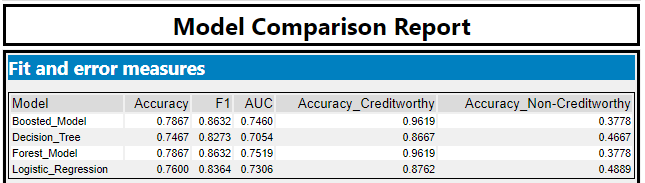

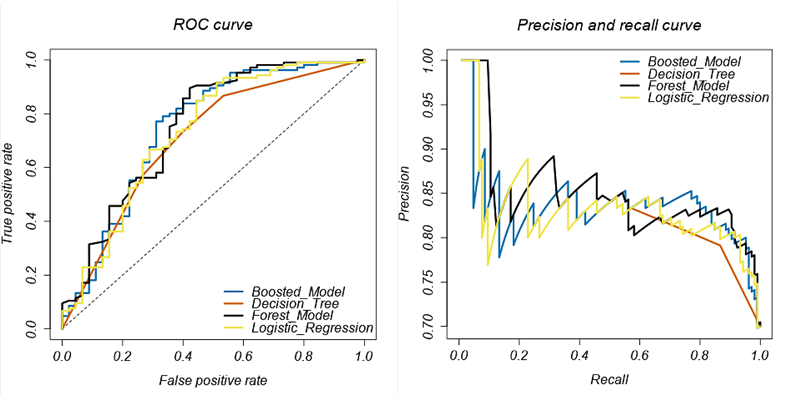
With the report, we can see that `Boosted Model` and `Forest Model` have the best rate of accuracy ( 78.67% for both). However, The ROC curve gives an expression that `Forest Model` is better when we use such models for prediction of creditworthiness. 

<a id='12'></a> 
#### b. Prediction of Application
After choosing model, we can use `Score Tool` in Alteryx to calculate the `Credit Application Result`. 

In [46]:
result1= pd.read_excel('result1.xlsx', sheet_name='Sheet1')
result1.sample(3)

,Account.Balance,Duration.of.Credit.Month,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Guarantors,Duration.in.Current.address,...,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker,Age_years,X_Creditworthy,X_Non-Creditworthy,Application_Result
341,Some Balance,18,Paid Up,Used car,3049,None,< 1yr,1,None,1,...,2,1,1,1,1,1,45,0.938,0.062,Creditworthy
280,No Account,36,Paid Up,Used car,3446,None,4-7 yrs,4,None,2,...,2,1,1,2,1,1,42,0.624,0.376,Creditworthy
33,No Account,12,Paid Up,Home Related,1567,None,< 1yr,1,None,1,...,2,1,1,1,2,1,22,0.410,0.590,Non-Creditworthy


And we can see that with `Forest Model`, from 500 new customers with given information in Dataset, we will classify into 2 category: `Creditworthy` and `Non-creditworthy` with the number like following:
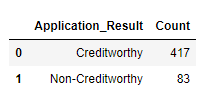


All of the process to choose a suitable model as well as to predict the application result follows the Alteryx Workflow:
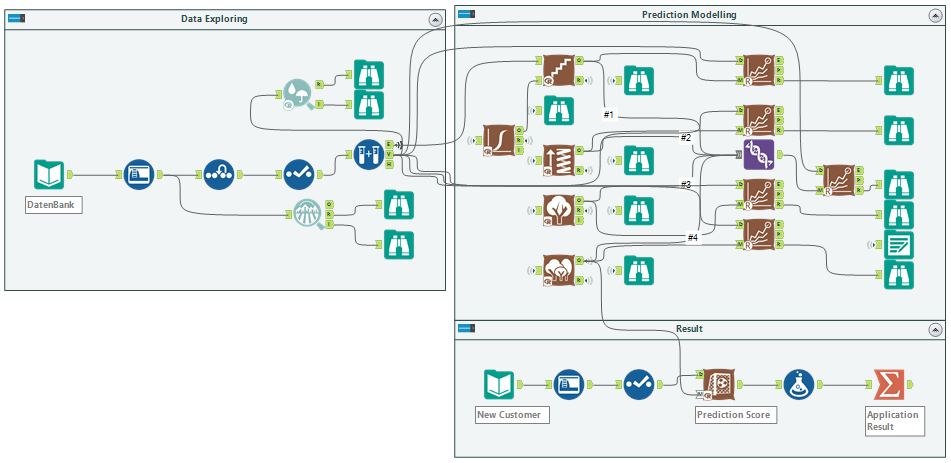